## Analise exploratorio (EDA)

### 2.0 Importar livrarias

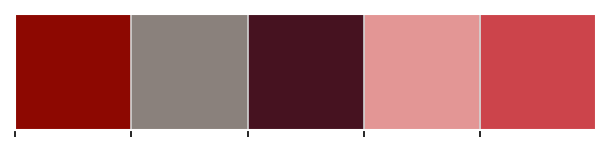

In [90]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

### 2.1 Carregamento de dados
- Os dados contem as informações dos passageiros que abordaram o titanic e a informação se eles sobreviveram depois do afundamento
- O dataset fica mais limpo depois de fazer a limpeza previa, deixando as variaveis mais relevantes en sus tipos de dados corretos reduzindo assim o uso da memoria e foram salvos num parquet.


In [91]:
parquet_file_path = '/home/david/Documents/VS_Code/ml_python/ML_PYTHON/dados/clean_titanic_data.parquet'
df = pd.read_parquet(parquet_file_path)

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fator_fare_sibSp
0,0,3,male,22,1,0,7.250000,S,3.620000
1,1,1,female,38,1,0,71.283302,C,35.639999
2,1,3,female,26,0,0,7.925000,S,7.920000
3,1,1,female,35,1,0,53.099998,S,26.549999
4,0,3,male,35,0,0,8.050000,S,8.050000


In [93]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fator_fare_sibSp
886,0,2,male,27,0,0,13.000000,S,13.00
887,1,1,female,19,0,0,30.000000,S,30.00
888,0,3,female,<NA>,1,2,23.450001,S,11.72
889,1,1,male,26,0,0,30.000000,C,30.00
890,0,3,male,32,0,0,7.750000,Q,7.75


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Dtype   
---  ------            -----   
 0   Survived          int8    
 1   Pclass            int8    
 2   Sex               category
 3   Age               Int16   
 4   SibSp             int8    
 5   Parch             int8    
 6   Fare              float32 
 7   Embarked          category
 8   Fator_fare_sibSp  float32 
dtypes: Int16(1), category(2), float32(2), int8(4)
memory usage: 22.0 KB


- Verificamos que os data types se mantem como foram otimizados

In [95]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df

,count,pct
Age,177,19.91
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Fare,0,0.00
Embarked,0,0.00
Fator_fare_sibSp,0,0.00


- É possível perceber que existem algumas lacunas que exigirão tratamento adicional na etapa de pré-processamento dos dados, incluindo imputações com média/mediana e assim por diante.

### 2.2 Split the data
- Vamos particionar os dados, considerando 80% para o trinamento e 20% para o teste

In [97]:
# 0% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [99]:
# Observe train and test default rates.
print(f"Train default rate: {train['Survived'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['Survived'].value_counts(normalize=True)}.")

Train default rate: Survived
0    0.610408
1    0.389592
Name: proportion, dtype: float64.

Test default rate: Survived
0    0.646067
1    0.353933
Name: proportion, dtype: float64.


In [2]:
df_train = pd.read_csv('dados/train_raw.csv')
df = df_train.copy()

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cat,Age_cat,PassengerId_cat,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,2,NaN,8,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,1,NaN,6,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,5,NaN,6,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,2,3.0,9,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,2,5.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q,2,NaN,5,1
708,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,9,5.0,4,1
709,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,2,6.0,8,0
710,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,2,6.0,6,0


### Visualização e exploração de dados para obter nformações uteis

Text(0, 0.5, 'Count')

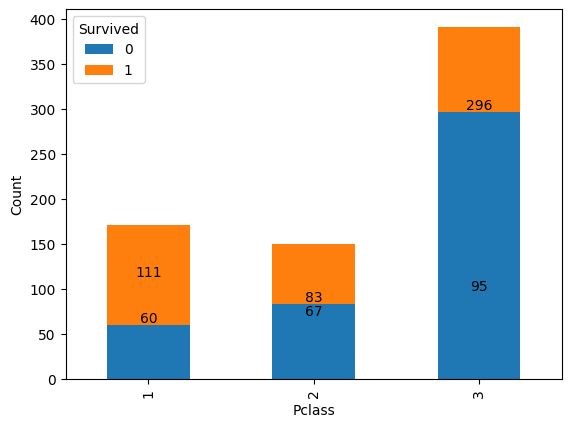

In [4]:
# analizar premissa  de tipo de classe foi salvo
df_agg_class = df.groupby(['Pclass', 'Survived']).agg(contagem=('Survived','count')).unstack().reset_index()
df_agg_class.plot(kind='bar', x='Pclass', y='contagem', stacked=True)

# Add labels and values to the bars
for i, bar in enumerate(df_agg_class.iterrows()):
    plt.text(i, bar[1]['contagem'][0], str(bar[1]['contagem'][0]), ha='center', va='bottom')
    plt.text(i, bar[1]['contagem'][1], str(bar[1]['contagem'][1]), ha='center', va='bottom')
# plt.ylim(0, df_agg_class['contagem'].max() + 10)
plt.xlabel('Pclass')
plt.ylabel('Count')


In [5]:
df_agg_class['porcentagem'] = df_agg_class['contagem'][1] / (df_agg_class['contagem'][0] + df_agg_class['contagem'][1])
df_agg_class
# o 60 porcento da classe 1 sobreviveu
# em quanto é menor a classe menor a taxa de sobrevivencia

Pclass contagem      porcentagem
Survived               0    1            
0             1       60  111    0.649123
1             2       83   67    0.446667
2             3      296   95    0.242967

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

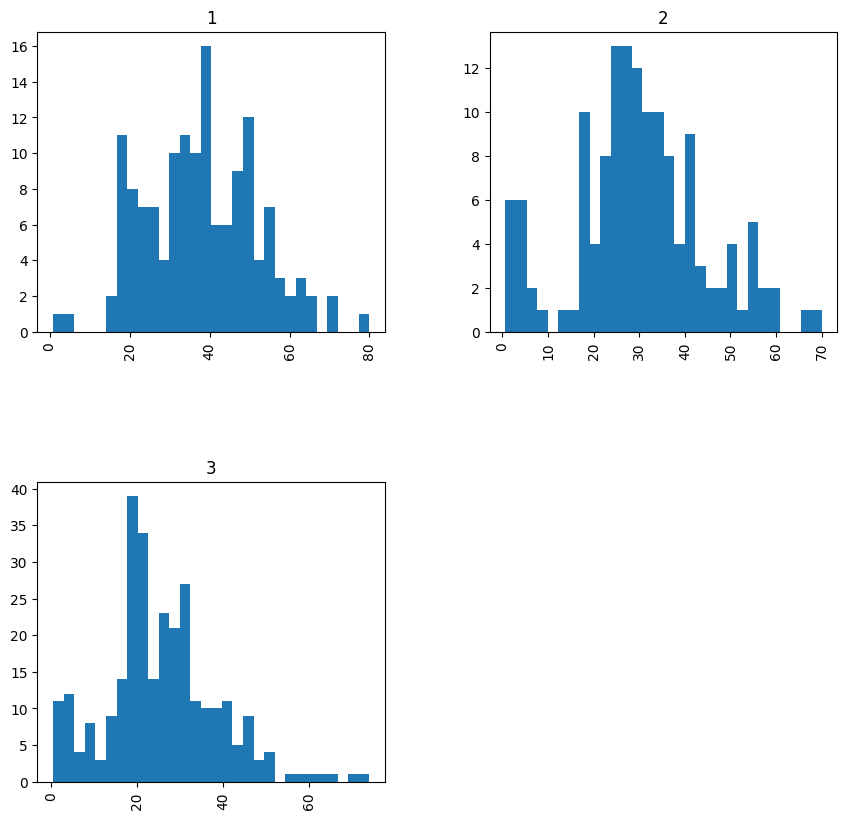

In [29]:
# Edades por clase que esteve no navio acrecentar linha de tendencia da distribuição
df['Age'].hist(by=df['Pclass'], bins=30, figsize=(10,10))
# a classe 3 tem uma distribuição mais jovem
# a classe 1 tem uma distribuição mais velha
# a classe 2 tem uma distribuição intermediaria

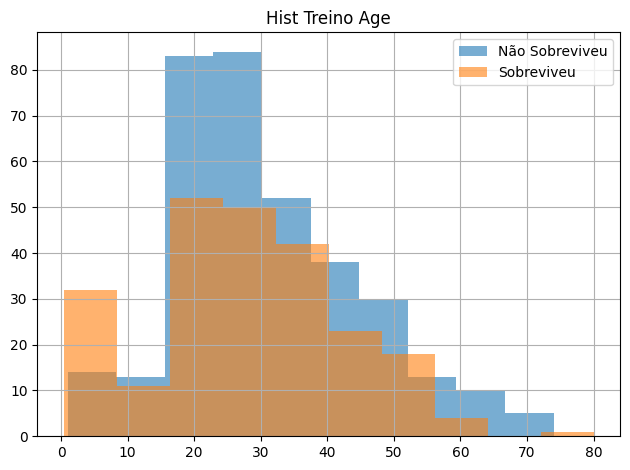

In [32]:
label = 'Age'
df[df['Survived']==0]['Age'].hist(alpha = 0.6, bins=10, label='Não Sobreviveu')
df[df['Survived']==1]['Age'].hist(alpha = 0.6,bins=10, label='Sobreviveu')

plt.title(f'Hist Treino {label}')

# Ajuste de layout
plt.tight_layout()
plt.legend()

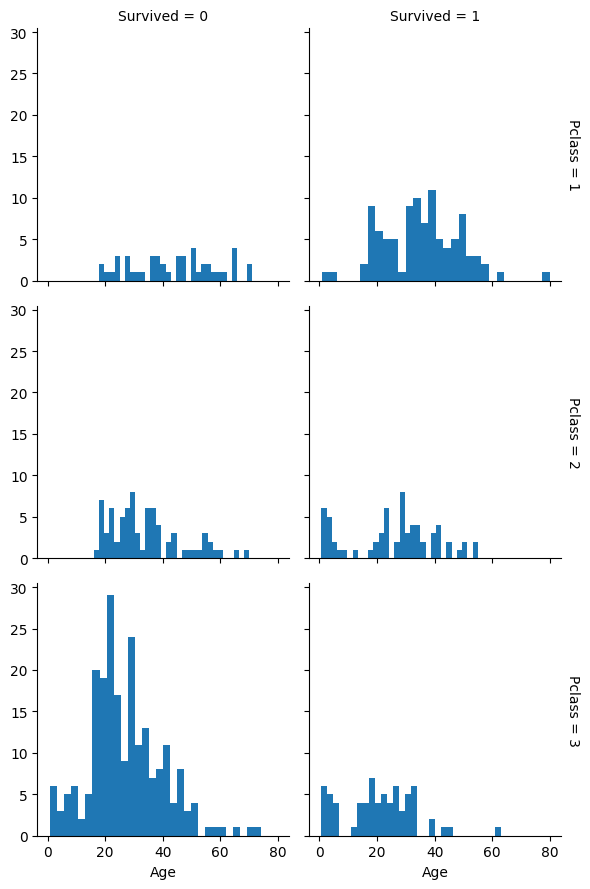

In [31]:
# criar o anterior grafico particionado pela label
g = sns.FacetGrid(df, col='Survived', row='Pclass', margin_titles=True)
g.map(plt.hist, 'Age', bins=30)
# a classe 1 tem uma taxa de sobrevivencia maior
# a classe 3 tem uma taxa de sobrevivencia menor
# a classe 2 tem uma taxa de sobrevivencia intermediaria
# a classe 1 tem uma distribuição mais velha
# a classe 3 tem uma distribuição mais jovem
# a classe 2 tem uma distribuição intermediaria

<Axes: xlabel='Embarked', ylabel='count'>

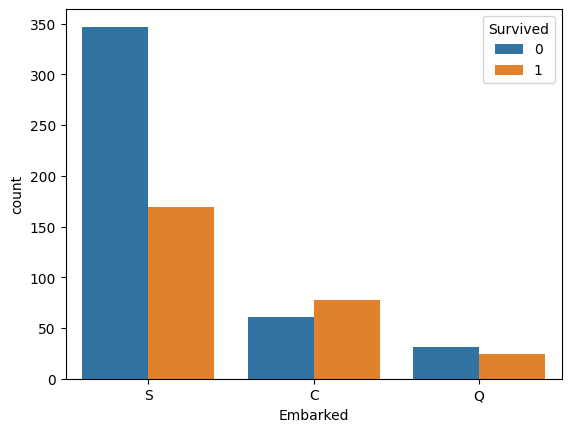

In [34]:
# plotar distribuição de Embarked   
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.countplot(x='Embarked', data=df, hue='Survived')
# Cherbourg tem uma taxa de sobrevivencia maior
# Queenstown tem uma taxa de sobrevivencia intermediaria
# Southampton tem uma taxa de sobrevivencia menor

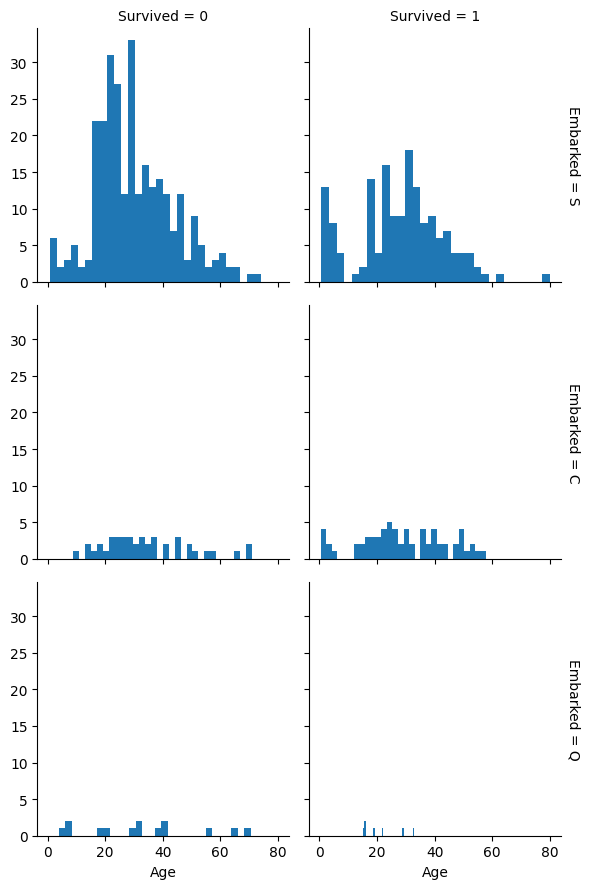

In [35]:
# criar o anterior grafico particionado pela label
g = sns.FacetGrid(df, col='Survived', row='Embarked', margin_titles=True)
g.map(plt.hist, 'Age', bins=30)
# Cherbourg tem uma taxa de sobrevivencia maior
# Queenstown tem uma taxa de sobrevivencia intermediaria
# Southampton tem uma taxa de sobrevivencia menor

In [36]:
# como validar numericamente que Cherbourg tem uma taxa de sobrevivencia maior
df_agg_embarked = df.groupby(['Embarked', 'Survived']).agg(contagem=('Survived','count')).unstack().reset_index()
df_agg_embarked['porcentagem'] = df_agg_embarked['contagem'][1] / (df_agg_embarked['contagem'][0] + df_agg_embarked['contagem'][1])
df_agg_embarked
# Cherbourg tem uma taxa de sobrevivencia maior

Embarked contagem      porcentagem
Survived                 0    1            
0               C       61   78    0.561151
1               Q       31   24    0.436364
2               S      347  169    0.327519

### Procurar correlações

In [61]:
# tirar colunas que são chaves ou muito pulverizadas
# criar uma lista onde filtermos as colunas que tenham mais de 80% de valores unicos
lista_colunas_nao_unicas = [col for col in df.columns if df[col].nunique() / df.shape[0] < 0.75]

print(lista_colunas_nao_unicas)

df_col_anali = df[lista_colunas_nao_unicas]
df_col_anali

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Fare_cat', 'Age_cat', 'PassengerId_cat', 'Survived']


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_cat,Age_cat,PassengerId_cat,Survived
0,3,male,NaN,0,0,56.4958,NaN,S,2,NaN,8,1
1,2,male,NaN,0,0,0.0000,NaN,S,1,NaN,6,0
2,1,male,NaN,0,0,221.7792,C95,S,5,NaN,6,0
3,3,female,18.0,0,1,9.3500,NaN,S,2,3,9,1
4,2,female,31.0,1,1,26.2500,NaN,S,2,5,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
707,3,female,NaN,0,0,7.8792,NaN,Q,2,NaN,5,1
708,1,female,35.0,0,0,512.3292,NaN,C,9,5,4,1
709,3,female,48.0,1,3,34.3750,NaN,S,2,6,8,0
710,1,male,47.0,0,0,38.5000,E63,S,2,6,6,0


In [75]:
label = 'Survived'
lista_colunas_numericas = df_col_anali.select_dtypes(include=[np.number]).columns.tolist()
lista_colunas_nao_numericas = df_col_anali.select_dtypes(include=[object]).columns.tolist()#.remove(label)
#lista_colunas_numericas = lista_colunas_numericas.remove(label)
print(lista_colunas_numericas)
print(lista_colunas_nao_numericas)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Fare_cat', 'PassengerId_cat', 'Survived']
['Sex', 'Cabin', 'Embarked']


In [77]:
df_col_anali[lista_colunas_numericas].corr()['Survived'].sort_values(ascending=False)

Survived           1.000000
Fare               0.275499
Fare_cat           0.235888
Parch              0.084178
PassengerId_cat    0.007189
SibSp             -0.026115
Age               -0.084268
Pclass            -0.348007
Name: Survived, dtype: float64

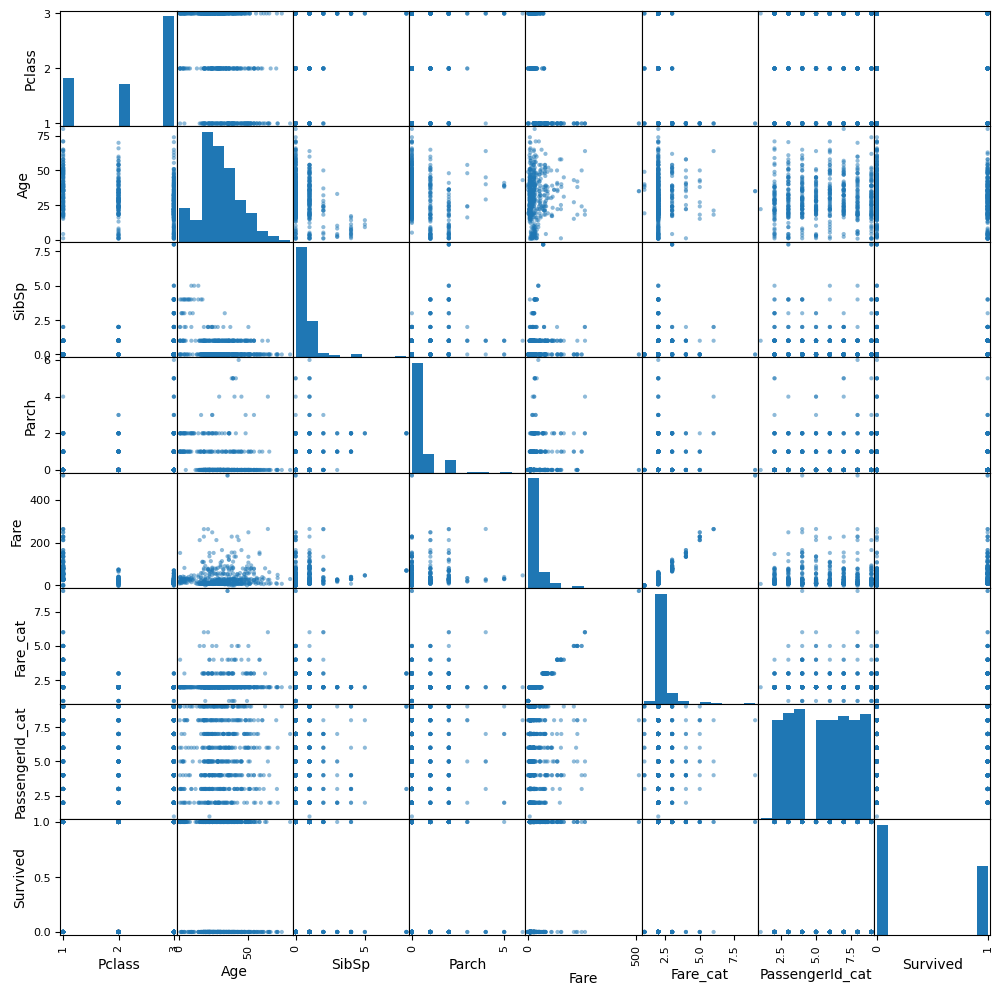

In [79]:
scatter_matrix = pd.plotting.scatter_matrix(df_col_anali[lista_colunas_numericas], figsize=(12, 12)) #, diagonal='kde')

In [82]:
#Experimentando para criar variaveis mais correlacionadas com a label

# criar uma variavel que é a soma de SibSp e Parch
df_col_anali['FamilySize'] = df_col_anali['SibSp'] + df_col_anali['Parch']

df_col_anali[lista_colunas_numericas+['FamilySize']].corr()['Survived'].sort_values(ascending=False)
# df['FamilySize'].corr(df['Survived'])
# a variavel FamilySize tem uma correlação positiva com a label
#

/tmp/ipykernel_350279/2789042345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_anali['FamilySize'] = df_col_anali['SibSp'] + df_col_anali['Parch']


Survived           1.000000
Fare               0.275499
Fare_cat           0.235888
Parch              0.084178
FamilySize         0.026967
PassengerId_cat    0.007189
SibSp             -0.026115
Age               -0.084268
Pclass            -0.348007
Name: Survived, dtype: float64

In [83]:
df_col_anali[lista_colunas_numericas+['FamilySize']].corr('spearman')['Survived'].sort_values(ascending=False)
                                                 

Survived           1.000000
Fare               0.342385
Fare_cat           0.278215
FamilySize         0.179567
Parch              0.146784
SibSp              0.097633
PassengerId_cat    0.007663
Age               -0.050810
Pclass            -0.345598
Name: Survived, dtype: float64